In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time

In [2]:
# 解决matplotlib中文乱码
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv("data.csv", encoding = "ISO-8859-1")

In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
# change data type
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# 1、	进行数据预处理
## 去除取消订单

In [9]:
# 去掉重复订单
df = df[~df["InvoiceNo"].str.startswith('C')]
df.shape

(532621, 8)

## 去掉完全重复的行

In [10]:
df = df.drop_duplicates()
df.shape

(527390, 8)

## 去除客户ID为空的行；

In [11]:
df = df[~df.CustomerID.isnull()] #去掉空ID

In [12]:
# 更改数据类别
df["CustomerID"] = df["CustomerID"].astype(str)
df["CustomerID"] = df["CustomerID"].str.replace('\.0', '', regex=True) # remove decimal

## 去除总金额（单价*数量）<=0的行

In [13]:
df["TotalAmount"] = df["Quantity"] * df["UnitPrice"] # 总价
df = df[~(df["TotalAmount"]<=0)] #去掉小于等于0的

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


# 2、	对用户进行RFM划分

对用户进行RFM划分，比较日期统一取2011年12月9日，最近消费时间的单位取天。计算用户标签，并用柱状图表示其分布。

In [15]:
date_format = "%Y-%m-%d"
y = "2011-12-09"
y = datetime.strptime(y, date_format)

In [16]:
# rmf_df
df1 = df[df.InvoiceDate <= y]
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [17]:
df1["CustomerID"].nunique()

4337

## 最近一次消费

In [18]:
# 找出每个客户最近一次消费的时间
recency_df = df1.groupby("CustomerID", as_index = False)["InvoiceDate"].agg({"recency_date":"max"})
recency_df["recency_date"] = recency_df["recency_date"].apply(lambda x: x.strftime("%Y-%m-%d"))
recency_df

,CustomerID,recency_date
0,12346,2011-01-18
1,12347,2011-12-07
2,12348,2011-09-25
3,12349,2011-11-21
4,12350,2011-02-02
...,...,...
4332,18280,2011-03-07
4333,18281,2011-06-12
4334,18282,2011-12-02
4335,18283,2011-12-06


In [19]:
# 计算时间间隔
recency_df["gap(days)"] = pd.to_datetime(recency_df["recency_date"])-y

recency_df["gap(days)"] = recency_df["gap(days)"].astype(str).str.extract(r'([0-9]+) days')
recency_df["gap(days)"] = recency_df["gap(days)"].astype(int)
recency_df.head()

,CustomerID,recency_date,gap(days)
0,12346,2011-01-18,325
1,12347,2011-12-07,2
2,12348,2011-09-25,75
3,12349,2011-11-21,18
4,12350,2011-02-02,310


In [20]:
recency_df.describe()

,gap(days)
count,4337.000000
mean,92.289371
std,99.904043
min,1.000000
25%,17.000000
50%,50.000000
75%,142.000000
max,373.000000


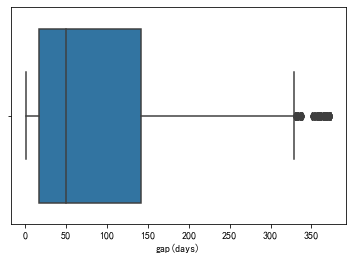

In [21]:
sns.boxplot(recency_df["gap(days)"])

In [22]:
# 为recency计算得分，(1-17) 4分，(17-50) 3分，（50-142）2分，（142-373） 1分
bins = [0,17,50,142,373]
labels = [4,3,2,1]
recency_df["r_score"] = pd.cut(recency_df["gap(days)"], bins,labels = labels)
recency_df["r_score"] = recency_df["r_score"].astype(int)

In [23]:
# Recency分类：标准分>=mean为高，反之为低
r_mean = recency_df["r_score"].mean()
recency_df["R"] = recency_df["r_score"].apply(lambda x: "高" if x >= r_mean else "低")

In [24]:
recency_df

,CustomerID,recency_date,gap(days),r_score,R
0,12346,2011-01-18,325,1,低
1,12347,2011-12-07,2,4,高
2,12348,2011-09-25,75,2,低
3,12349,2011-11-21,18,3,高
4,12350,2011-02-02,310,1,低
...,...,...,...,...,...
4332,18280,2011-03-07,277,1,低
4333,18281,2011-06-12,180,1,低
4334,18282,2011-12-02,7,4,高
4335,18283,2011-12-06,3,4,高


## 消费频率

In [25]:
# 计算消费次数，对一天多次购买行为进行去重
frequency_df = df1.groupby("CustomerID", as_index = False)["InvoiceNo"].agg({"times":"nunique"})
frequency_df

,CustomerID,times
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1
...,...,...
4332,18280,1
4333,18281,1
4334,18282,2
4335,18283,16


In [26]:
frequency_df["times"].describe()

count    4337.000000
mean        4.263546
std         7.678770
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       208.000000
Name: times, dtype: float64

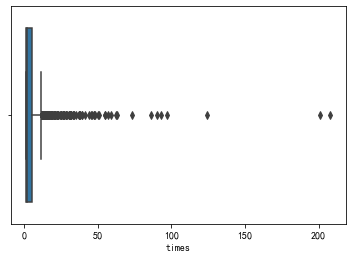

In [27]:
sns.boxplot(frequency_df["times"])

In [28]:
# 得分：0-1:1分，1-2： 2分，2-5:3分，5以上：4分
bins = [0,1,2,5,208]
labels = [1,2,3,4]
frequency_df["F_score"] = pd.cut(frequency_df["times"], bins, labels = labels)
frequency_df["F_score"] = frequency_df["F_score"].astype(int)

In [29]:
frequency_df

,CustomerID,times,F_score
0,12346,1,1
1,12347,7,4
2,12348,4,3
3,12349,1,1
4,12350,1,1
...,...,...,...
4332,18280,1,1
4333,18281,1,1
4334,18282,2,2
4335,18283,16,4


In [30]:
# 平均得分
f_mean = frequency_df["F_score"].mean()

# 高于等于平均得分“高”，反之为低
frequency_df["F"] = frequency_df["F_score"].apply(lambda x: "高" if x >= f_mean else "低" )

In [31]:
frequency_df

,CustomerID,times,F_score,F
0,12346,1,1,低
1,12347,7,4,高
2,12348,4,3,高
3,12349,1,1,低
4,12350,1,1,低
...,...,...,...,...
4332,18280,1,1,低
4333,18281,1,1,低
4334,18282,2,2,低
4335,18283,16,4,高


## 消费金额

In [32]:
monetary_df = df1.groupby("CustomerID", as_index = False)["TotalAmount"].agg({"TotalPay":"sum"})
monetary_df

,CustomerID,TotalPay
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40
...,...,...
4332,18280,180.60
4333,18281,80.82
4334,18282,178.05
4335,18283,2045.53


In [33]:
monetary_df.describe()

,TotalPay
count,4337.000000
mean,2006.658804
std,8616.720617
min,2.900000
25%,306.450000
50%,667.650000
75%,1651.030000
max,280206.020000


In [34]:
# 得分
bins = [0,307,668,1652,300000]
labels = [1,2,3,4]
monetary_df["m_score"] = pd.cut(monetary_df["TotalPay"],bins,labels = labels)
monetary_df["m_score"] = monetary_df["m_score"].astype(int)

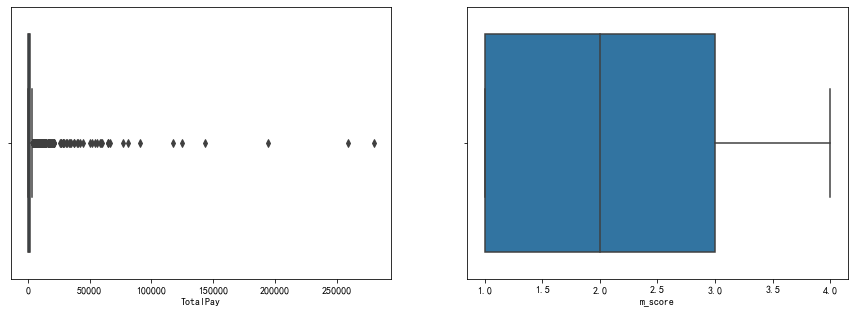

In [35]:
plt.figure(figsize = (15,5))

# 总消费金额
plt.subplot(121)
sns.boxplot(monetary_df["TotalPay"])

# M得分
plt.subplot(122)
sns.boxplot(monetary_df["m_score"])

In [36]:
# 平均分
m_score = monetary_df["m_score"].mean()

# 分类
monetary_df["M"] = monetary_df["m_score"].apply(lambda x: "高" if x>= m_score else "低")

In [37]:
monetary_df

,CustomerID,TotalPay,m_score,M
0,12346,77183.60,4,高
1,12347,4310.00,4,高
2,12348,1797.24,4,高
3,12349,1757.55,4,高
4,12350,334.40,2,低
...,...,...,...,...
4332,18280,180.60,1,低
4333,18281,80.82,1,低
4334,18282,178.05,1,低
4335,18283,2045.53,4,高


## 柱状图展示

### Recency

In [38]:
recency = recency_df.groupby("R", as_index = False)["CustomerID"].count()
recency

,R,CustomerID
0,低,2166
1,高,2171


<BarContainer object of 2 artists>

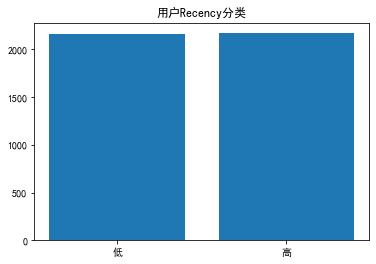

In [39]:
plt.title("用户Recency分类")
plt.bar(recency["R"], recency["CustomerID"])

### Frequency

In [40]:
frequency = frequency_df.groupby("F", as_index = False)["CustomerID"].count()
frequency

,F,CustomerID
0,低,2329
1,高,2008


<BarContainer object of 2 artists>

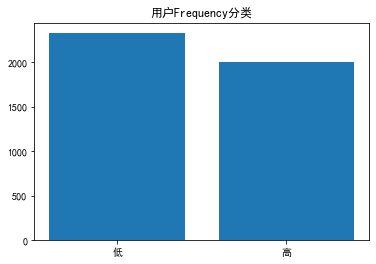

In [41]:
plt.title("用户Frequency分类")
plt.bar(frequency["F"], frequency["CustomerID"])

### Monetary

In [42]:
monetary = monetary_df.groupby("M", as_index = False)["CustomerID"].count()
monetary

,M,CustomerID
0,低,2169
1,高,2168


<BarContainer object of 2 artists>

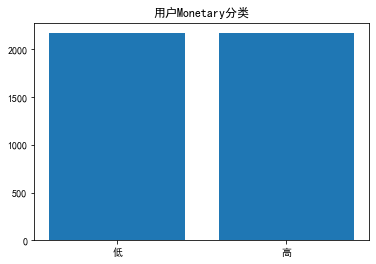

In [43]:
plt.title("用户Monetary分类")
plt.bar(monetary["M"], monetary["CustomerID"])

### 汇总

In [44]:
# 合并dataframe
rfm1 = pd.merge(recency_df, frequency_df, on = "CustomerID")
rfm = pd.merge(rfm1, monetary_df, on = "CustomerID")
rfm

,CustomerID,recency_date,gap(days),r_score,R,times,F_score,F,TotalPay,m_score,M
0,12346,2011-01-18,325,1,低,1,1,低,77183.60,4,高
1,12347,2011-12-07,2,4,高,7,4,高,4310.00,4,高
2,12348,2011-09-25,75,2,低,4,3,高,1797.24,4,高
3,12349,2011-11-21,18,3,高,1,1,低,1757.55,4,高
4,12350,2011-02-02,310,1,低,1,1,低,334.40,2,低
...,...,...,...,...,...,...,...,...,...,...,...
4332,18280,2011-03-07,277,1,低,1,1,低,180.60,1,低
4333,18281,2011-06-12,180,1,低,1,1,低,80.82,1,低
4334,18282,2011-12-02,7,4,高,2,2,低,178.05,1,低
4335,18283,2011-12-06,3,4,高,16,4,高,2045.53,4,高


In [45]:
# 给客户分类
for i in list(range(0,4337)):
    # M为高
    if((rfm.loc[i,"R"] == "高")&(rfm.loc[i,"F"] == "高")&(rfm.loc[i,"M"] == "高")):
        rfm.loc[i,"user_category"] = "重要价值用户"
    elif ((rfm.loc[i,"R"] == "高")&(rfm.loc[i,"F"] == "低")&(rfm.loc[i,"M"] == "高")):
        rfm.loc[i,"user_category"] = "重要发展用户"
    elif ((rfm.loc[i,"R"] == "低")&(rfm.loc[i,"F"] == "高")&(rfm.loc[i,"M"] == "高")):
        rfm.loc[i,"user_category"] = "重要保持用户"
    elif ((rfm.loc[i,"R"] == "低")&(rfm.loc[i,"F"] == "低")&(rfm.loc[i,"M"] == "高")):
        rfm.loc[i,"user_category"] = "重要挽留用户"
        
    # M为低
    elif ((rfm.loc[i,"R"] == "高")&(rfm.loc[i,"F"] == "高")&(rfm.loc[i,"M"] == "低")):
        rfm.loc[i,"user_category"] = "一般价值用户"
    elif ((rfm.loc[i,"R"] == "高")&(rfm.loc[i,"F"] == "低")&(rfm.loc[i,"M"] == "低")):
        rfm.loc[i,"user_category"] = "一般发展用户"    
    elif ((rfm.loc[i,"R"] == "低")&(rfm.loc[i,"F"] == "高")&(rfm.loc[i,"M"] == "低")):
        rfm.loc[i,"user_category"] = "一般保持用户"    
    else:
        rfm.loc[i,"user_category"] = "一般挽留用户"

In [46]:
rfm

,CustomerID,recency_date,gap(days),r_score,R,times,F_score,F,TotalPay,m_score,M,user_category
0,12346,2011-01-18,325,1,低,1,1,低,77183.60,4,高,重要挽留用户
1,12347,2011-12-07,2,4,高,7,4,高,4310.00,4,高,重要价值用户
2,12348,2011-09-25,75,2,低,4,3,高,1797.24,4,高,重要保持用户
3,12349,2011-11-21,18,3,高,1,1,低,1757.55,4,高,重要发展用户
4,12350,2011-02-02,310,1,低,1,1,低,334.40,2,低,一般挽留用户
...,...,...,...,...,...,...,...,...,...,...,...,...
4332,18280,2011-03-07,277,1,低,1,1,低,180.60,1,低,一般挽留用户
4333,18281,2011-06-12,180,1,低,1,1,低,80.82,1,低,一般挽留用户
4334,18282,2011-12-02,7,4,高,2,2,低,178.05,1,低,一般发展用户
4335,18283,2011-12-06,3,4,高,16,4,高,2045.53,4,高,重要价值用户


In [47]:
rfm.isnull().sum()

CustomerID       0
recency_date     0
gap(days)        0
r_score          0
R                0
times            0
F_score          0
F                0
TotalPay         0
m_score          0
M                0
user_category    0
dtype: int64

In [48]:
rfm_df2 = rfm.groupby("user_category",as_index = False)["CustomerID"].agg({"count":"count"})
rfm_df2 = rfm_df2.sort_values(by = "count", ascending = False)
rfm_df2

,user_category,count
3,一般挽留用户,1306
4,重要价值用户,1297
2,一般发展用户,580
5,重要保持用户,428
7,重要挽留用户,293
6,重要发展用户,150
0,一般价值用户,144
1,一般保持用户,139


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

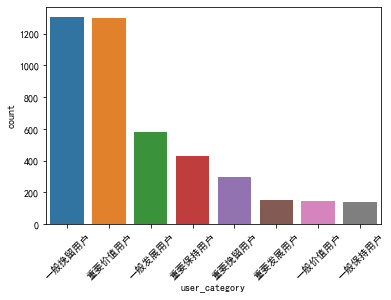

In [49]:
sns.barplot(rfm_df2["user_category"],rfm_df2["count"])
plt.xticks(rotation = 45)